# Rascunho

In [3]:
import numpy as np
import pystan as ps
import sympy as sp
import networkx as nx

import matplotlib.pyplot as plt
import arviz as az
import seaborn as sns
sns.set()

from scipy.special import expit, logit

%matplotlib inline

import pickle

import sys
sys.path.append('../scripts/')

from utilits import ParameterAlpha, BivariateBeta

In [335]:
compiled = True
#compiled = False

if compiled: 
    sm1 = pickle.load(open('../models/extra/sketch-v1.pkl', 'rb'))
else: 
    sm1 = ps.StanModel(file = '../models/extra/sketch-v1.stan')
    with open('../models/extra/sketch-v1.pkl', 'wb') as f:
        pickle.dump(sm1, f)
        
compiled = True
#compiled = False

if compiled: 
    sm2 = pickle.load(open('../models/extra/sketch-v2.pkl', 'rb'))
else: 
    sm2 = ps.StanModel(file = '../models/extra/sketch-v2.stan')
    with open('../models/extra/sketch-v2.pkl', 'wb') as f:
        pickle.dump(sm2, f)
        
compiled = True
#compiled = False

if compiled: 
    sm3 = pickle.load(open('../models/extra/sketch-v3.pkl', 'rb'))
else: 
    sm3 = ps.StanModel(file = '../models/extra/sketch-v3.stan')
    with open('../models/extra/sketch-v3.pkl', 'wb') as f:
        pickle.dump(sm3, f)
        
compiled = True
#compiled = False

if compiled: 
    sm4 = pickle.load(open('../models/extra/sketch-v4.pkl', 'rb'))
else: 
    sm4 = ps.StanModel(file = '../models/extra/sketch-v4.stan')
    with open('../models/extra/sketch-v4.pkl', 'wb') as f:
        pickle.dump(sm4, f)

#compiled = True
compiled = False

if compiled: 
    sm5 = pickle.load(open('../models/extra/sketch-v5.pkl', 'rb'))
else: 
    sm5 = ps.StanModel(file = '../models/extra/sketch-v5.stan')
    with open('../models/extra/sketch-v5.pkl', 'wb') as f:
        pickle.dump(sm5, f)
        
compiled = True
#compiled = False

if compiled: 
    sm6 = pickle.load(open('../models/extra/sketch-v6.pkl', 'rb'))
else: 
    sm6 = ps.StanModel(file = '../models/extra/sketch-v6.stan')
    with open('../models/extra/sketch-v6.pkl', 'wb') as f:
        pickle.dump(sm6, f)
        
compiled = True
#compiled = False

if compiled: 
    sm7 = pickle.load(open('../models/extra/sketch-v7.pkl', 'rb'))
else: 
    sm7 = ps.StanModel(file = '../models/extra/sketch-v7.stan')
    with open('../models/extra/sketch-v7.pkl', 'wb') as f:
        pickle.dump(sm7, f)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3b53e006972557112353ed6098db3965 NOW.


In [338]:
n = 500
p = 10

X = np.random.multivariate_normal(mean = np.zeros(p+1),
                                  cov = np.eye(p+1), 
                                  size = n)
X = (X - X.mean(axis = 0))/X.std(axis = 0)
X[:,0] = 1

#W = nx.adjacency_matrix(nx.generators.trees.random_tree(n = n)).toarray()
W = nx.adjacency_matrix(nx.random_graphs.erdos_renyi_graph(n = n, p = 1/n)).toarray()
for i in range(n):
    if sum(W[i,:]) == 0:
        j = np.random.choice([k for k in range(n) if k != i])
        W[i,j] = 1
        W[j,i] = 1
        
W_n = W.sum() // 2
D = np.diag(W.sum(axis = 1))

rho = 0.5
tau = 1
prev  = 0.2
beta = np.array([logit(prev), -1.5, 0.4, 1, 0, 0.3, -0.8, 2, 0.9, 1.3, -1.93])

phi = np.random.multivariate_normal(mean = np.zeros(n), 
                                    cov = (1/tau) * np.linalg.inv(D - rho * W))

y = np.random.binomial(n = 1, p = expit(phi + X @ beta))
#y = np.random.poisson(np.exp(logit(prev) + phi + log_offset))

mu_beta = np.zeros(p+1)
mu_beta[0] = -2.7

cov_beta = np.eye(p+1)
cov_beta[0,0] = 1.3
    
data5 = {
    "n": n,
    "p": p,
    "X": X[:,1:],
    "y": y,
    "W": W,
    "W_n": W_n,
    "mu_beta": mu_beta[1:],
    "cov_beta": cov_beta[1:,1:],
    "alpha_tau": 0.01,
    "beta_tau": 0.01,
    "alpha_prev": 1,
    "beta_prev": 4,
    "lambda_tau": np.log(10),
    "gumbel_prior": 1,
}

data6 = {
    "n": n,
    "p": p,
    "X": X,
    "y": y,
    "W": W,
    "W_n": W_n,
    "mu_beta": mu_beta,
    "cov_beta": cov_beta,
    "alpha_tau": 0.01,
    "beta_tau": 0.01,
    "lambda_tau": np.log(10),
    "gumbel_prior": 1,
}

(array([  1.,   7.,  29.,  63., 110., 122.,  88.,  54.,  23.,   3.]),
 array([-14.42004941, -11.97497623,  -9.52990305,  -7.08482987,
         -4.63975669,  -2.19468351,   0.25038967,   2.69546286,
          5.14053604,   7.58560922,  10.0306824 ]),
 <BarContainer object of 10 artists>)

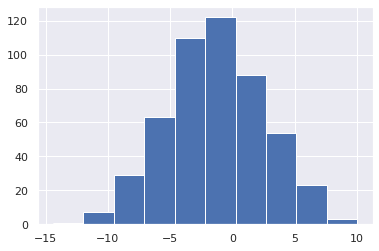

In [319]:
plt.hist(phi + X @ beta)

In [ ]:
%%time
fit5 = sm5.sampling(data=data5, 
                   control = {'adapt_delta': 0.95}, 
                   iter = 4000
                  )
summary5 = az.summary(fit5)

In [321]:
%%time
fit6 = sm6.sampling(data=data6, 
                   control = {'adapt_delta': 0.9}, 
                   #iter = 4000
                  )
summary6 = az.summary(fit6)

CPU times: user 4.61 s, sys: 120 ms, total: 4.73 s
Wall time: 27.6 s


In [305]:
%%time
fit7 = sm7.sampling(data=data5, 
                   control = {'adapt_delta': 0.9}, 
                   #iter = 4000
                  )
summary7 = az.summary(fit7)

CPU times: user 3.15 s, sys: 103 ms, total: 3.25 s
Wall time: 18.1 s


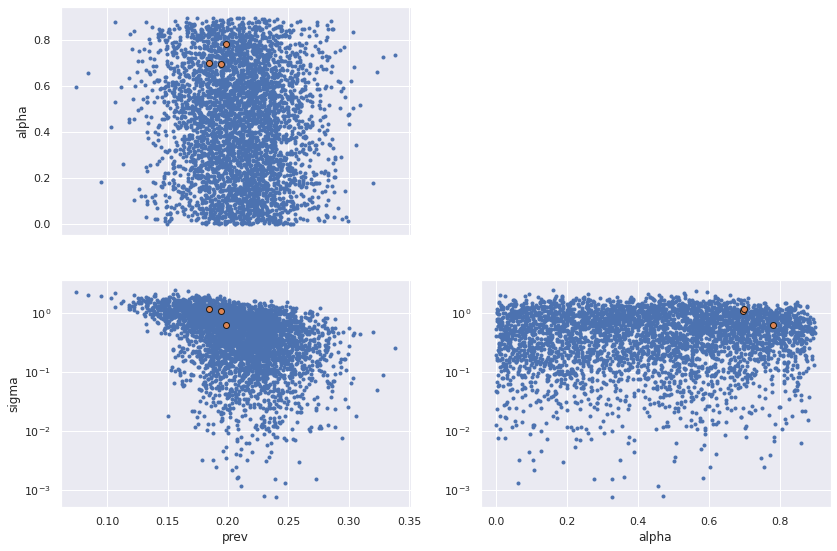

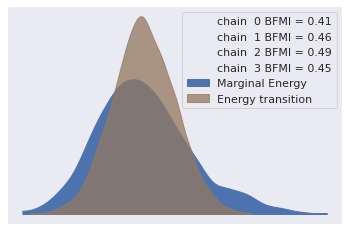

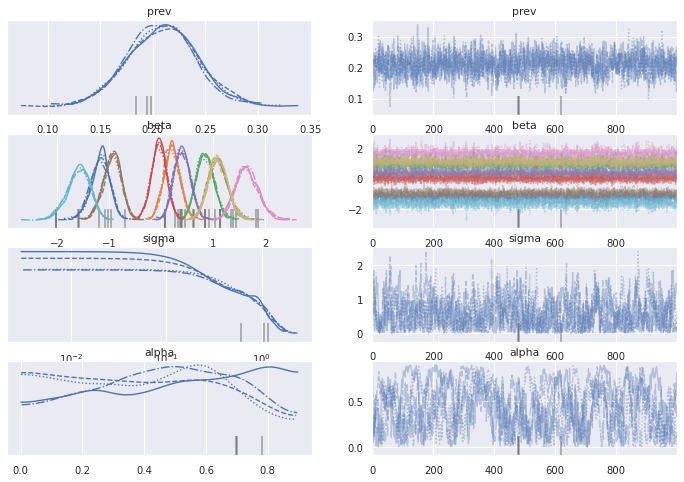

In [340]:
inference_data = az.convert_to_inference_data(fit5)
ax = az.plot_pair(inference_data, var_names=('prev', 'alpha', 'sigma'), 
                  divergences=True, group = 'posterior')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')
plt.show()

az.plot_energy(fit5)
plt.show()

ax = az.plot_trace(fit5, var_names=('prev', 'beta', 'sigma', 'alpha'))
ax[2,0].set_xscale('log')
plt.show()

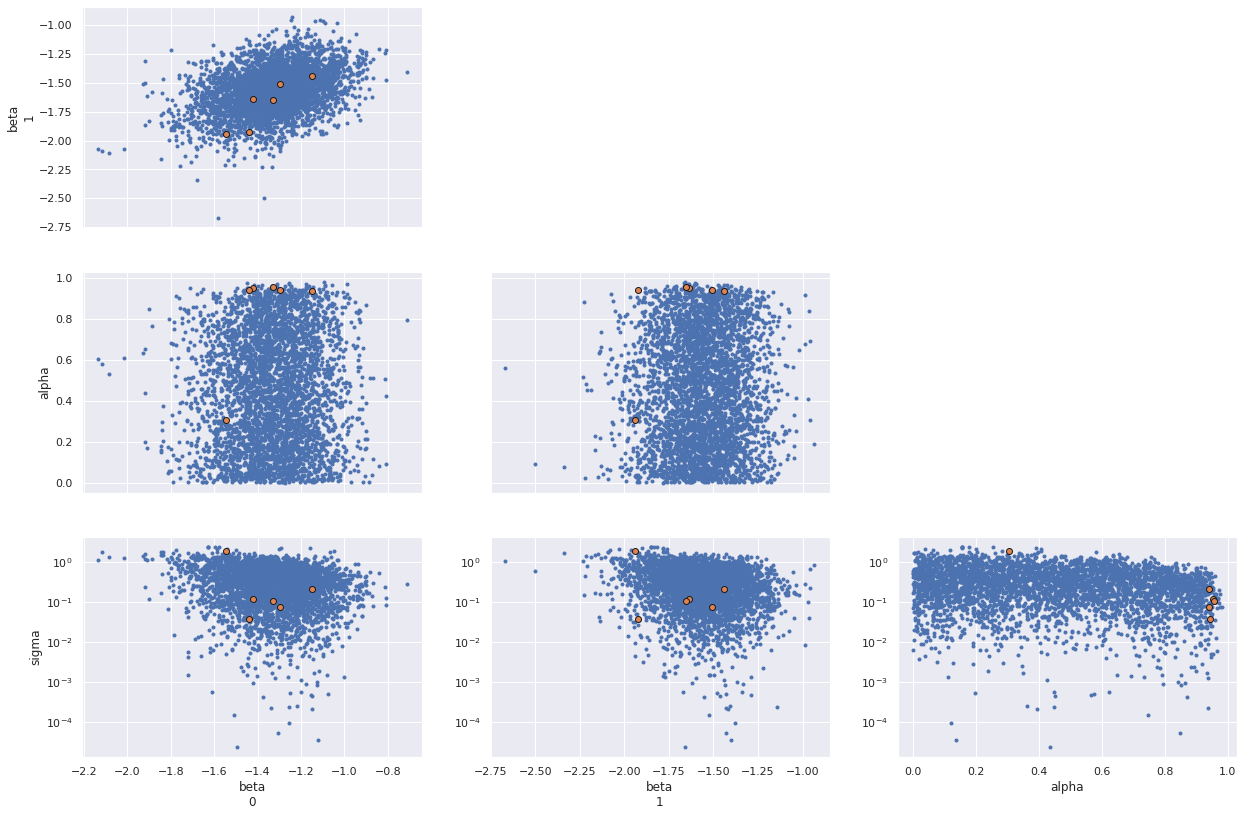

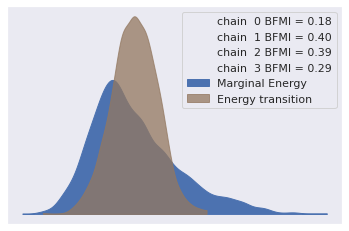

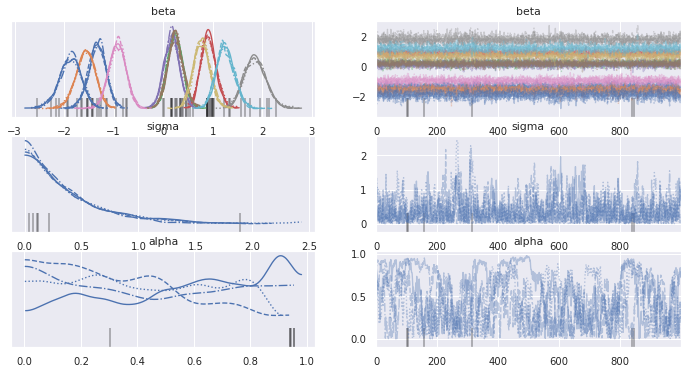

In [316]:
inference_data = az.convert_to_inference_data(fit6)
ax = az.plot_pair(inference_data, var_names=('beta', 'alpha', 'sigma'),
                  coords={'beta_dim_0': [0,1]},
                  divergences=True, group = 'posterior')
ax[2,0].set_yscale('log')
ax[2,1].set_yscale('log')
ax[2,2].set_yscale('log')
plt.show()

az.plot_energy(fit6)
plt.show()

ax = az.plot_trace(fit6, var_names=('beta', 'sigma', 'alpha'))
plt.show()

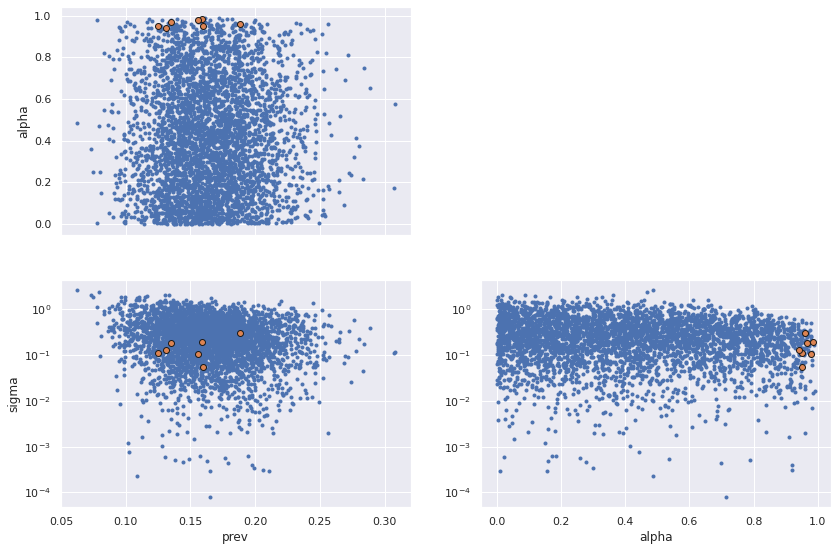

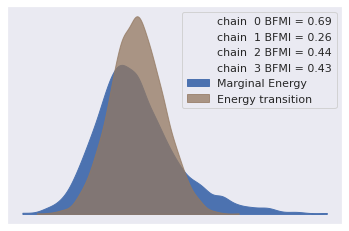

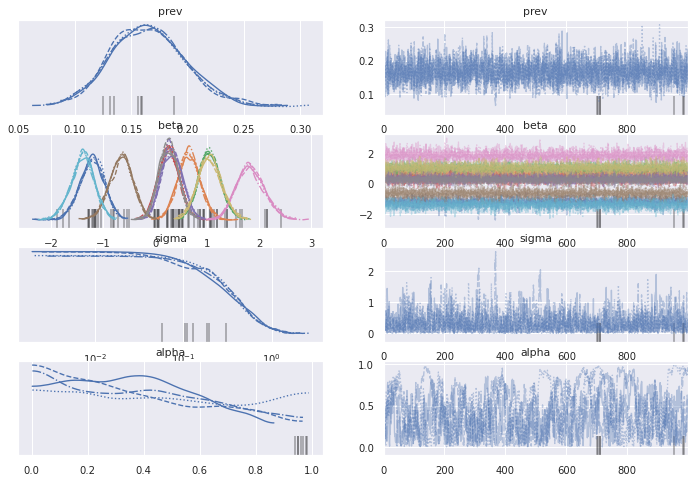

In [302]:
inference_data = az.convert_to_inference_data(fit7)
ax = az.plot_pair(inference_data, var_names=('prev', 'alpha', 'sigma'), 
                  divergences=True, group = 'posterior')
ax[1,0].set_yscale('log')
ax[1,1].set_yscale('log')
plt.show()

az.plot_energy(fit7)
plt.show()

ax = az.plot_trace(fit7, var_names=('prev', 'beta', 'sigma', 'alpha'))
ax[2,0].set_xscale('log')
plt.show()